In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import os
import cv2 as cv
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [10]:
train_path = '/content/drive/My Drive/Colab Notebooks/data'
test_path = '/content/drive/My Drive/Colab Notebooks/test data'
valid_path = '/content/drive/My Drive/Colab Notebooks/valid data'

In [14]:
train_data = []
test_data = []
valid_data = []

In [16]:
size = 100
Vehicles = ["Car", "Truck", "Bus", "Motorcycle"]
# load train data
for vehicle in Vehicles:
    path = os.path.join(train_path, vehicle)
    index_of_img = Vehicles.index(vehicle)
    for img in os.listdir(path):
        image = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
        resized_img = cv.resize(image, (size, size))
        train_data.append([resized_img, index_of_img])


NameError: ignored

In [19]:
# shuffle
random.shuffle(train_data)
print(len(train_data))
# load test data
for vehicle in Vehicles:
    path = os.path.join(test_path, vehicle)
    index_of_img = Vehicles.index(vehicle)
    for img in os.listdir(path):
        image = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
        resized_img = cv.resize(image, (size, size))
        test_data.append([resized_img, index_of_img])


# load valid data
for vehicle in Vehicles:
    path = os.path.join(valid_path, vehicle)
    index_of_img = Vehicles.index(vehicle)
    for img in os.listdir(path):
        image = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
        resized_img = cv.resize(image, (size, size))
        valid_data.append([resized_img, index_of_img])

# shuffle
random.shuffle(valid_data)




8420


AttributeError: ignored

In [25]:
print(len(test_data))
print(len(valid_data))
print(len(train_data))

76
277
8420


In [27]:
X_train = []
Y_train = []
for features , labels in train_data:
  X_train.append(features)
  Y_train.append(labels)
print(len(X_train))
X_train = np.array(X_train).reshape(-1, size, size, 1)


X_test = []
Y_test = []
for features , labels in test_data:
  X_test.append(features)
  Y_test.append(labels)

X_test = np.array(X_test).reshape(-1, size, size, 1)


X_valid = []
Y_valid = []
for features , labels in valid_data:
  X_valid.append(features)
  Y_valid.append(labels)
X_valid = np.array(X_valid).reshape(-1, size, size, 1)

8420


In [28]:
print(X_train.shape)

(8420, 100, 100, 1)


In [29]:
X_train = X_train/np.max(X_train)
X_train = X_train.astype(np.float32)

X_test = X_test/np.max(X_test)
X_test = X_test.astype(np.float32)

X_valid = X_valid/np.max(X_valid)
X_valid = X_valid.astype(np.float32)

In [31]:
print(X_train[0].shape)

(100, 100, 1)


In [33]:
import pickle

In [34]:
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle", "wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle", "wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

pickle_out = open("X_valid.pickle", "wb")
pickle.dump(X_valid, pickle_out)
pickle_out.close()

pickle_out = open("Y_valid.pickle", "wb")
pickle.dump(Y_valid, pickle_out)
pickle_out.close()

In [36]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
os.environ['KMP_DUPLICATE_LIB_OK']='True'
print('loaded train set :', X_train.shape)
print('loaded test set :', X_test.shape)
print('loaded test set :', X_valid.shape)
Y_test_one_hot = to_categorical(Y_test)
Y_train_one_hot = to_categorical(Y_train)
Y_valid_one_hot = to_categorical(Y_valid)
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(100, 100 , 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(1024, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

loaded train set : (8420, 100, 100, 1)
loaded test set : (76, 100, 100, 1)
loaded test set : (277, 100, 100, 1)


In [37]:
print(Y_train_one_hot)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.fit(X_train, Y_train_one_hot, batch_size=25, epochs=50, validation_data=(X_valid, Y_valid_one_hot))


Epoch 1/50
337/337 [==============================] - 24s 71ms/step - loss: 0.3134 - accuracy: 0.8887 - val_loss: 0.6328 - val_accuracy: 0.8159
Epoch 2/50
337/337 [==============================] - 23s 70ms/step - loss: 0.3132 - accuracy: 0.8855 - val_loss: 0.6004 - val_accuracy: 0.8014
Epoch 3/50
337/337 [==============================] - 23s 69ms/step - loss: 0.2845 - accuracy: 0.8974 - val_loss: 0.5916 - val_accuracy: 0.8303
Epoch 4/50
337/337 [==============================] - 23s 70ms/step - loss: 0.2572 - accuracy: 0.9126 - val_loss: 0.8148 - val_accuracy: 0.8087
Epoch 5/50
337/337 [==============================] - 24s 70ms/step - loss: 0.2238 - accuracy: 0.9211 - val_loss: 0.5930 - val_accuracy: 0.8195
Epoch 6/50
337/337 [==============================] - 23s 70ms/step - loss: 0.1976 - accuracy: 0.9319 - val_loss: 0.5705 - val_accuracy: 0.8087
Epoch 7/50
337/337 [==============================] - 23s 70ms/step - loss: 0.1944 - accuracy: 0.9348 - val_loss: 0.8203 - val_accuracy:

In [49]:
model.save_weights("model2_weights.h5")

In [50]:
predictions = model.predict(x=X_test, verbose=0)

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[20  0  0  0]
 [ 2 12  4  0]
 [ 2  4 14  0]
 [ 0  0  0 18]]


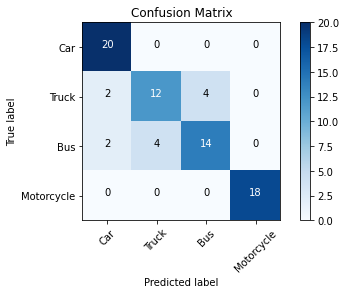

In [52]:
cm = confusion_matrix(y_true=Y_test, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ["Car", "Truck", "Bus", "Motorcycle"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

[[[[0.8745098 ]
   [0.87058824]
   [0.8745098 ]
   ...
   [0.90588236]
   [0.9137255 ]
   [0.9137255 ]]

  [[0.87058824]
   [0.87058824]
   [0.8784314 ]
   ...
   [0.9098039 ]
   [0.9137255 ]
   [0.9019608 ]]

  [[0.8666667 ]
   [0.8745098 ]
   [0.8784314 ]
   ...
   [0.9137255 ]
   [0.91764706]
   [0.9254902 ]]

  ...

  [[0.19607843]
   [0.18039216]
   [0.19215687]
   ...
   [0.20784314]
   [0.1882353 ]
   [0.21568628]]

  [[0.19215687]
   [0.18431373]
   [0.18039216]
   ...
   [0.27058825]
   [0.34509805]
   [0.34509805]]

  [[0.20392157]
   [0.19215687]
   [0.20784314]
   ...
   [0.3372549 ]
   [0.34901962]
   [0.29803923]]]


 [[[0.46666667]
   [0.4745098 ]
   [0.47843137]
   ...
   [0.15294118]
   [0.30980393]
   [0.64705884]]

  [[0.45490196]
   [0.48235294]
   [0.4745098 ]
   ...
   [0.14509805]
   [0.30588236]
   [0.41568628]]

  [[0.44705883]
   [0.47058824]
   [0.47058824]
   ...
   [0.29411766]
   [0.20784314]
   [0.3529412 ]]

  ...

  [[0.4       ]
   [0.42745098]
   [0.4